In [ ]:
#beta come into place, find the beta relationship with 90 percent
# find minimal N
#do the test
#there are two part of the HW

In [4]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
np.set_printoptions(precision=5)

In [5]:
#Create a function that simulate the outcomes in control and treatment arms,
# and then performs a permutation test
def permutation_test(N):
    control_sample_size= N
    treated_sample_size= N

    repeats=1000
    #there are only two outcomes, get infection or not get infection
    outcomes=np.array([0, 1])
    control_p=[0.5, 0.5] #probability of getting infect =0.5
    treated_p=[0.9, 0.1] #probability of getting infect =0.1
    
    #create the control samples 
    control_samples=np.random.choice(outcomes,size=(repeats,control_sample_size),p=control_p) #repeat = row, control_sample = columns
    #calculate the mean in each control repeat
    control_means=np.mean(control_samples,axis=1) #Axis =1  will calculate the mean of each row
    
    #create the treated samples 
    treated_samples=np.random.choice(outcomes,size=(repeats,treated_sample_size),p=treated_p)
    #calculate the mean in each treatment repeat
    treated_means=np.mean(treated_samples,axis=1) #Axis =1  will calculate the mean of each row

    #Do the Fisher permutations 

    # First mix control and treated samples together
    combined = np.concatenate((treated_samples, control_samples), axis=1)
    #calculate the mean of means to subtract them to get the observed_difference
    observed_difference = control_means-treated_means 
    #print(observed_difference)
    
    number_of_splits=1000 #split the combined sample into two groups 1000 times
    differences=np.zeros(number_of_splits) #create an array to store the difference each time
    all_copy= combined
    #loop through the 1000 times
    for i in range(number_of_splits):
        np.random.shuffle(all_copy[i,:]) #Shuffle the combined sample
        fake_control=all_copy[i,treated_sample_size:] #store the fake control group
        fake_treated=all_copy[i,:treated_sample_size] #store the fake treatment group
        #calculate the difference btw two groups and add them to the list 
        differences[i]=fake_control.mean()-fake_treated.mean()
    #calculate the p-value
    p_value = np.sum(differences >= observed_difference)/differences.size

    return p_value

Text(0, 0.5, 'P-value')

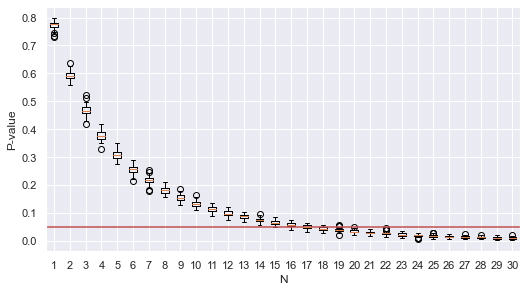

In [6]:
p_value_dic={}
number_of_tests = 100
#Test each value of N
for N in range(1,31):
    p_value_ls=[]
    for i in range(number_of_tests):
        #Obtain the p-value in each trial
        p_value = permutation_test(N)
        p_value_ls.append(p_value)
    p_value_dic[N]= p_value_ls

plt.rcParams["figure.figsize"] = [8.50, 4.50]
fig, ax = plt.subplots()

ax.boxplot(p_value_dic.values())
ax.set_xticklabels(p_value_dic.keys())
ax.axhline(0.05,color='r')
ax.set_xlabel('N',fontsize=12)
ax.set_ylabel('P-value',fontsize=12)

In [7]:
#test for 1000 times
number_of_trials = 1000
times_pvalue_less = 0
# loop through 1000 times of trails
for i in range(number_of_trials):
    #Obtain the p-value in each trial when N=18
    p_value = permutation_test(18)
    #print(p_value)

    #Check in the p-value is less than the alph= 0.05 (level of significance)
    if p_value <= 0.05:
        times_pvalue_less += 1
# the number of times that p-value is less than alph= 0.05 divided by the total number of trials to get the fraction of trail that meet the condition 
confidence = times_pvalue_less/number_of_trials
print("When N =18, the confidence that the trial passes the statistical test is :",confidence)


When N =18, the confidence that the trial passes the statistical test is : 0.863


In [8]:
#test for 1000 times
number_of_trials = 1000
times_pvalue_less = 0
# loop through 1000 times of trails
for i in range(number_of_trials):
    #Obtain the p-value in each trial when N=19
    p_value = permutation_test(19)
    #print(p_value)

    #Check in the p-value is less than the alph= 0.05 (level of significance)
    if p_value <= 0.05:
        times_pvalue_less += 1
# the number of times that p-value is less than alph= 0.05 divided by the total number of trials to get the fraction of trail that meet the condition 
confidence = times_pvalue_less/number_of_trials
print("When N =19, the confidence that the trial passes the statistical test is :",confidence)

When N =19, the confidence that the trial passes the statistical test is : 0.972


In [ ]:
# N = 19 for one tail test